In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params, load_params
from multi_group_simulation import MultiGroupSimulation
import datetime
import pandas as pd
import pprint

In [5]:
base_params_free = load_params('../src/simulations_v2/params/apr7calibration/faculty_staff_post_movein_private.yaml')[1]
base_params_selfiso = load_params('../src/simulations_v2/params/quarantine_analysis/oct12quarantine/ug_self_iso.yaml')[1]
base_params_post_movein = load_params('../src/simulations_v2/params/apr7calibration/faculty_staff_pre_semester_private.yaml')[1]

In [7]:
pprint.pprint(base_params_free)

{'ID_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA42A0FCA0>,
 'SyID_mild_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA464E7E50>,
 'SyID_severe_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA4650F040>,
 'cases_isolated_per_contact': 0.255,
 'cases_quarantined_per_contact': 2.5,
 'contact_trace_testing_frac': 1,
 'contact_tracing_delay': 1,
 'daily_outside_infection_p': 2.2e-05,
 'days_between_tests': 1,
 'expected_contacts_per_day': 10,
 'exposed_infection_p': 0.018,
 'exposed_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA4297F790>,
 'initial_E_count': 0,
 'initial_ID_count': 0,
 'initial_ID_prevalence': 0,
 'initial_SyID_mild_count': 0,
 'initial_SyID_severe_count': 0,
 'initial_pre_ID_count': 0,
 'max_time_ID': 8,
 'max_time_SyID_mild': 20,
 'max_time_SyID_severe': 20,
 'max_time_exposed': 7,
 'max_time_pre_ID': 4,
 'mild_severity_levels': 1,

In [8]:
pprint.pprint(base_params_post_movein)

{'ID_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA464E79D0>,
 'SyID_mild_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA464E78B0>,
 'SyID_severe_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA464E7820>,
 'cases_isolated_per_contact': 0.255,
 'cases_quarantined_per_contact': 2.5,
 'contact_trace_testing_frac': 1,
 'contact_tracing_delay': 1,
 'daily_outside_infection_p': 2.2e-05,
 'days_between_tests': 1,
 'expected_contacts_per_day': 10,
 'exposed_infection_p': 0.018,
 'exposed_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x000001EA464E7940>,
 'initial_E_count': 0,
 'initial_ID_count': 0,
 'initial_ID_prevalence': 0,
 'initial_SyID_mild_count': 0,
 'initial_SyID_severe_count': 0,
 'initial_pre_ID_count': 0,
 'max_time_ID': 8,
 'max_time_SyID_mild': 20,
 'max_time_SyID_severe': 20,
 'max_time_exposed': 7,
 'max_time_pre_ID': 4,
 'mild_severity_levels': 1,

In [5]:
print(base_params_selfiso)

{'severity_prevalence': array([0.52 , 0.472, 0.006, 0.002]), 'population_size': 2200, 'initial_ID_prevalence': 0, 'max_time_ID': 8, 'ID_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000242B0AD2940>, 'max_time_SyID_mild': 20, 'SyID_mild_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000242B0AD28B0>, 'max_time_SyID_severe': 20, 'SyID_severe_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000242B0AD29D0>, 'max_time_exposed': 7, 'exposed_time_function': <function poisson_waiting_function.<locals>.<lambda> at 0x00000242B0AD2A60>, 'exposed_infection_p': 0.017, 'expected_contacts_per_day': 5.5, 'daily_outside_infection_p': 2.2e-05, 'mild_symptoms_daily_self_report_p': 0, 'severe_symptoms_daily_self_report_p': 0.18, 'sample_QI_exit_function': <function binomial_exit_function.<locals>.<lambda> at 0x00000242B0AD2AF0>, 'sample_QS_exit_function': <function binomial_exit_function.<locals>.<lambda> at 0x00000242B0

In [11]:
#outside_infection_week = pd.read_csv('outside_infection_staff.csv')
#outside_infection_week = outside_infection_week.drop('Unnamed: 0', axis = 1)

weeks = [34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53]
cases = [0,
0,
1,
0,
0,
4,
7,
1,
9,
6,
8,
14,
12,
23,
22,
18,
23,
11,
21,
0]

# quick patch since last week is january
import datetime
print(datetime.datetime(2021,1,4).isocalendar()[1])

weeks.append(1)
cases.append(22)
outside_infection_week = pd.DataFrame(np.column_stack((weeks,cases)), columns = ['week','new_weekly_cases'])
outside_infection_week['new_weekly_cases'] = outside_infection_week['new_weekly_cases']/(7*(10283))
outside_infection_week

1


,week,new_weekly_cases
0,34,0.000000
1,35,0.000000
2,36,0.000014
3,37,0.000000
4,38,0.000000
5,39,0.000056
6,40,0.000097
7,41,0.000014
8,42,0.000125
9,43,0.000083


In [12]:
from analysis_helpers import binomial_exit_function
base_params_selfiso['population_size'] = 0
base_params_free['population_size'] = 10283 
base_params_free['test_population_fraction'] = 0 
base_params_free['test_protocol_QFNR'] =.43
# data analysis shows 106 non-"arrival" positives during movein period
# 33 of these were found b/c of symptoms or surveillance
base_params_free['cases_isolated_per_contact'] =.85
base_params_post_movein['test_population_fraction'] =0.098 #weighted average for students, weighted average for faculty and staff
base_params_free['test_protocol_QFNR'] = .43
base_params_free['daily_outside_infection_p'] = 0
base_params_free['sample_QI_exit_function'] = binomial_exit_function(0)
base_params_post_movein['sample_QI_exit_function'] = binomial_exit_function(0)

init_pop_count = 10283
new_population_counts = [int(count) for count in """0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0""".split('\n')]

movein_contact_matrix = np.matrix(
    [[base_params_free['expected_contacts_per_day'], 0],
    [0, base_params_selfiso['expected_contacts_per_day']]])


from dynamic_population_sim import DynamicPopulationSim

def init_movein_sim(transmissions_per_contact, isolations_per_trace=None, outside_infection_week = None):
    avg_init_cases = 0
    infxn_prob = avg_init_cases / (sum(new_population_counts) + init_pop_count)
    base_params = base_params_free.copy()
    init_exposed =  np.random.binomial(init_pop_count, infxn_prob)
    base_params['initial_E_count'] = init_exposed
    base_params['exposed_infection_p'] = transmissions_per_contact
    base_params_post_movein['exposed_infection_p'] = transmissions_per_contact
    base_params_post_movein['outside_infection_p_array'] = outside_infection_week
    
    if isolations_per_trace != None:
        base_params_free['cases_isolated_per_contact'] = isolations_per_trace
        base_params_post_movein['cases_isolated_per_contact']=isolations_per_trace
    free_group_population_dynamics = {}
    movein_time_horizon = 18 # 8/16 through 9/2
    new_case_exposed_rate = 1
    for t in range(movein_time_horizon):
        new_pop = new_population_counts[t]
        new_cases = np.random.binomial(new_pop, infxn_prob)
        new_exposed = np.random.binomial(new_cases, new_case_exposed_rate)
        free_group_population_dynamics[t] = {'S': new_pop - new_exposed, 'E': new_exposed, 'ID': new_cases- new_exposed}
        
    dynamic_pop_sim = DynamicPopulationSim(
        base_params,
        base_params_selfiso,
        base_params_post_movein,
        movein_contact_matrix,
        movein_time_horizon,
        free_group_population_dynamics,
        {}
    )
    return dynamic_pop_sim

In [13]:
#private

actuals = pd.read_csv('https://raw.githubusercontent.com/peter-i-frazier/group-testing/master/src/simulations_v2/params/jan4calibration/actual_counts_group_4_extended_period.csv')
actual_counts = actuals['cum_case_count']
len(actual_counts)



148

In [14]:
actual_counts

0        0
1        0
2        0
3        0
4        0
      ... 
143    222
144    236
145    237
146    244
147    246
Name: cum_case_count, Length: 148, dtype: int64

Text(0.5, 1.0, 'Staff Case Counts')

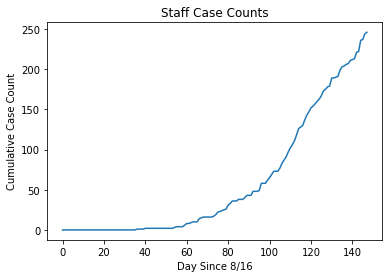

In [15]:
#subtract to center 0,0

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(actual_counts)), actual_counts)
plt.xlabel('Day Since 8/16')
plt.ylabel('Cumulative Case Count')
plt.title('Staff Case Counts')

In [16]:
## Evaluating the simulator off a _ day horizon

len(actual_counts)

148

In [17]:
import pandas as pd

def sample_movein_trajectory(transmission_p, isos_per_trace=None,outside_infection_week = None):
    dynamic_pop_sim = init_movein_sim(transmission_p, isos_per_trace,outside_infection_week)
    # for each day
    for i in range(len(actual_counts)):
        dynamic_pop_sim.step()
    movein_df = dynamic_pop_sim.movein_sim.sims[0].sim_df
    post_movein_df = dynamic_pop_sim.post_movein_sim.sim_df

    
    post_movein_df.index = range(movein_df.shape[0]-1, post_movein_df.shape[0] + movein_df.shape[0] -1)
    df = pd.concat([movein_df, post_movein_df[1:]])

    return list(df['QI'])

def sample_trajectories(transmission_p, ntrajectories, isos_per_trace=None, outside_infection_week = None):
    trajectories = []
    for _ in range(ntrajectories):
        t = sample_movein_trajectory(transmission_p, isos_per_trace,outside_infection_week)
        trajectories.append(t)
    return trajectories


from math import sqrt

def score_trajectories(trajectories):
    errors = []
    for t in trajectories:
        error = 0
        for a, b in zip(t, actual_counts):
            error += (a-b)**2
        errors.append(np.log(sqrt(error / len(t))))
    return np.mean(errors)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_trajectories(trajs, title):
    plt.figure(figsize=(10,6))
    label='Simulated Case Counts'
    for t in trajs:
        plt.plot(range(len(t)), t, color='blue', alpha=0.5, label=label)
        label=None
    plt.plot(range(len(actual_counts)), actual_counts, color='red', linewidth=3, 
             alpha=0.7, label='Observed Case Counts')
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

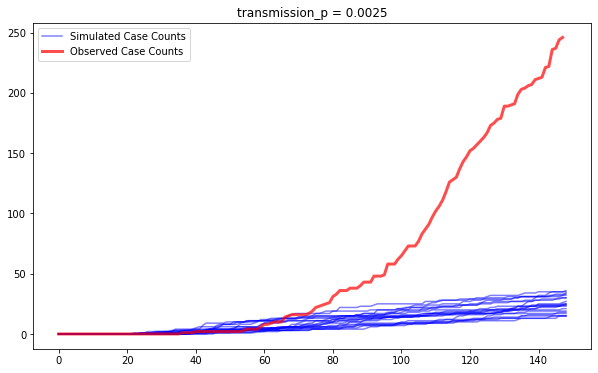

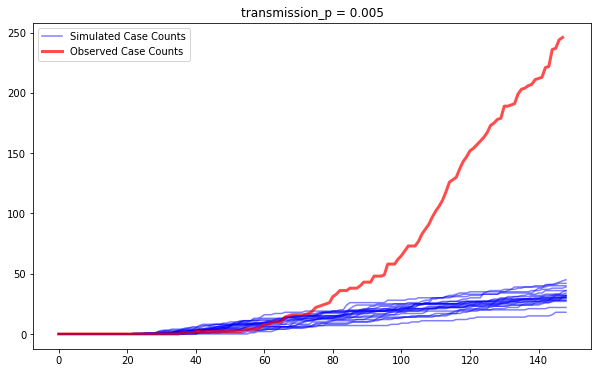

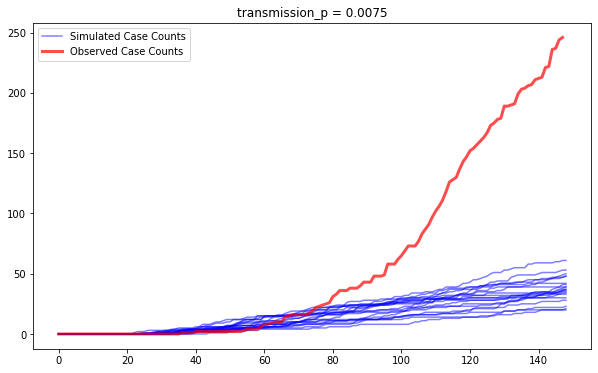

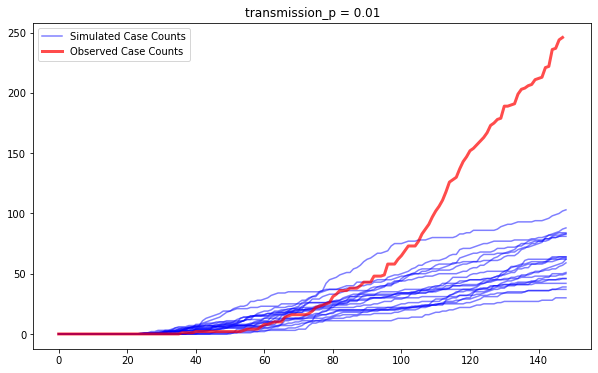

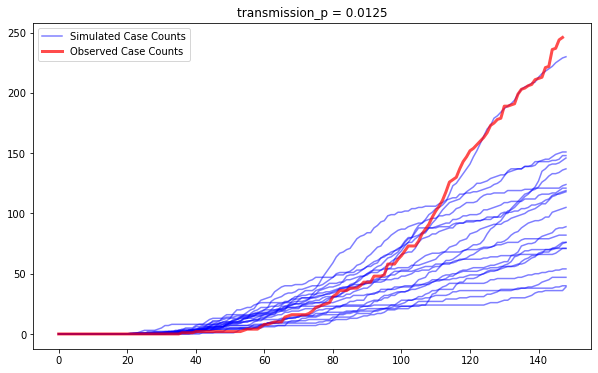

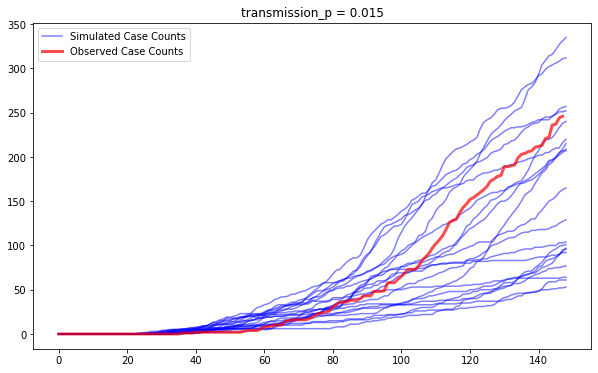

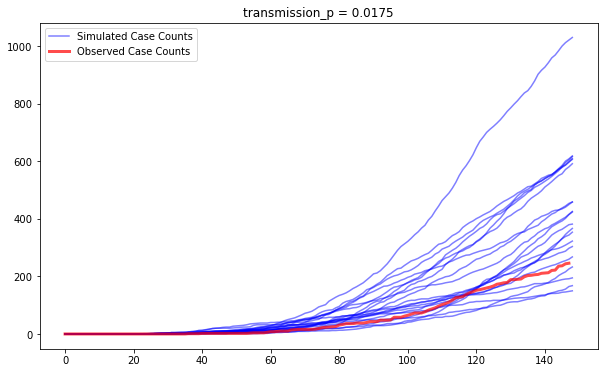

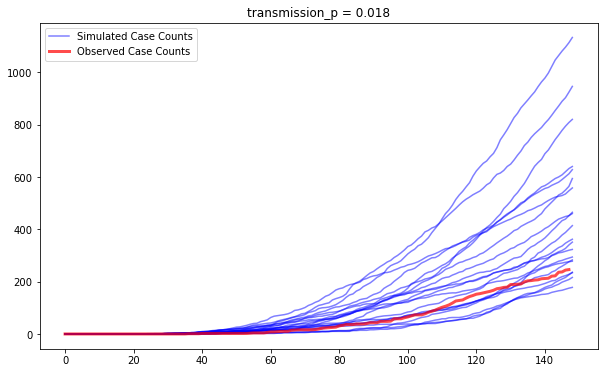

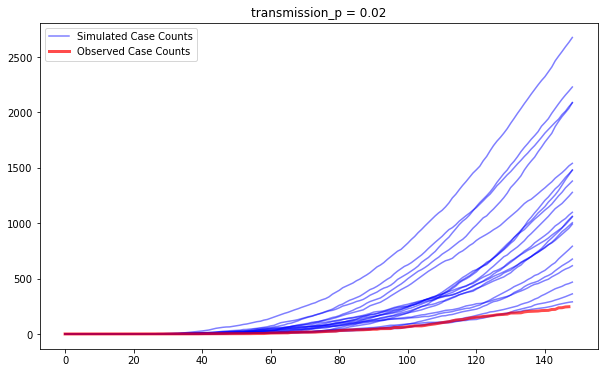

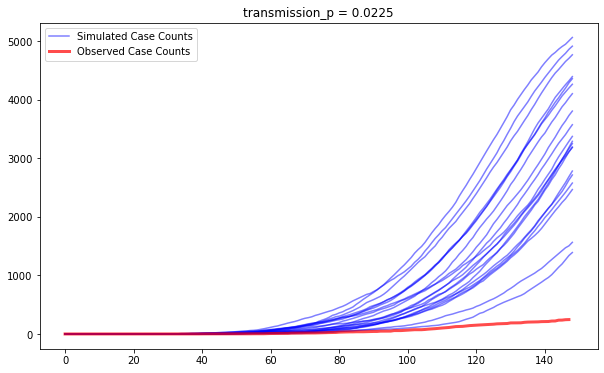

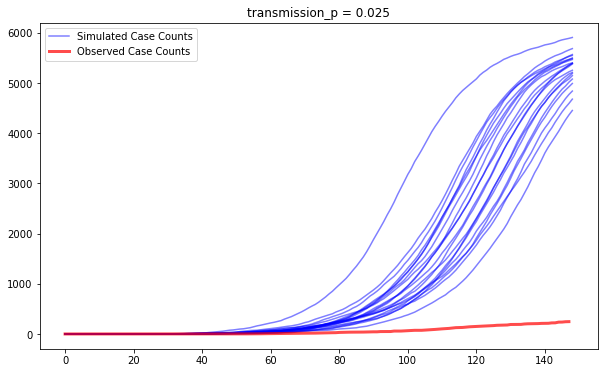

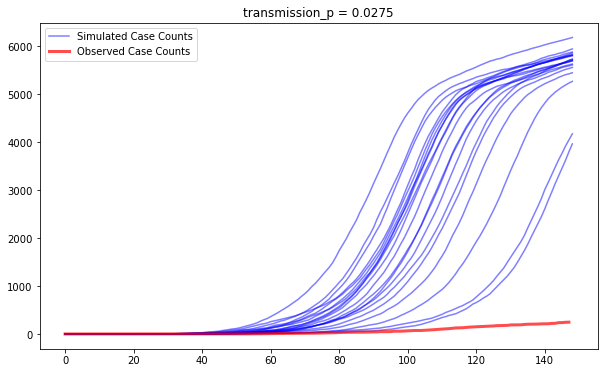

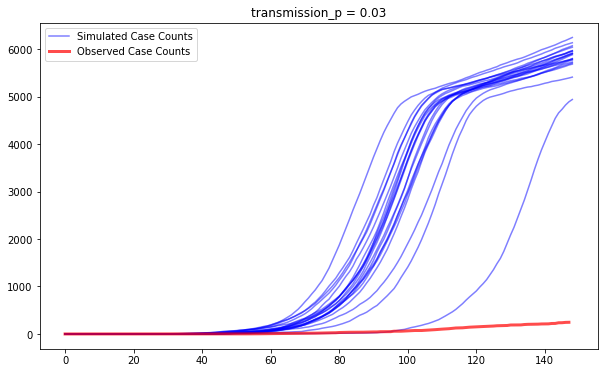

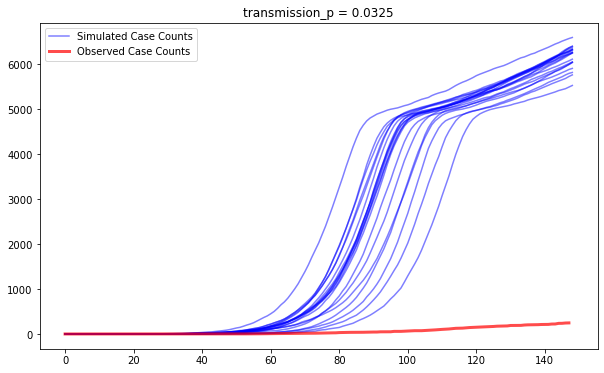

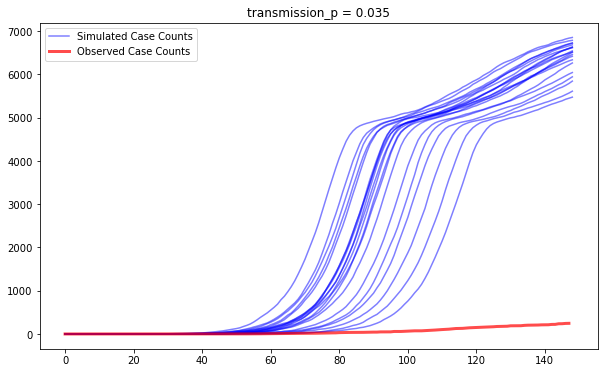

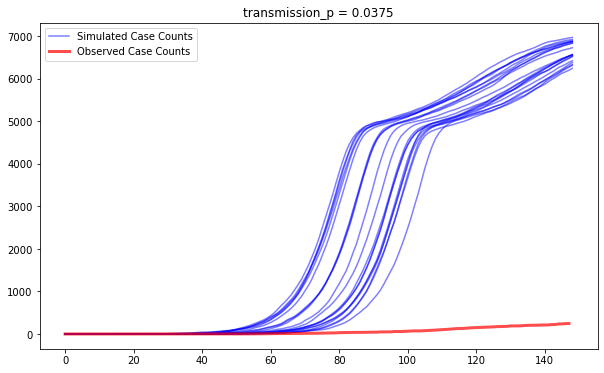

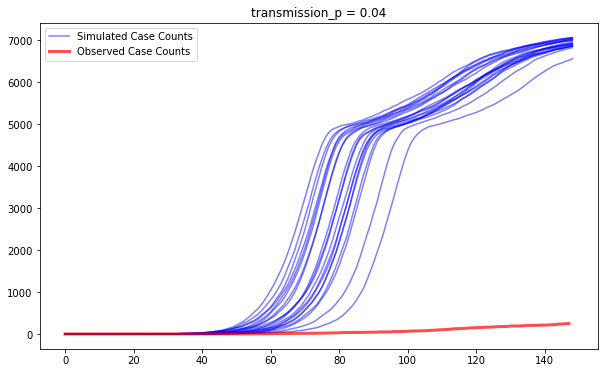

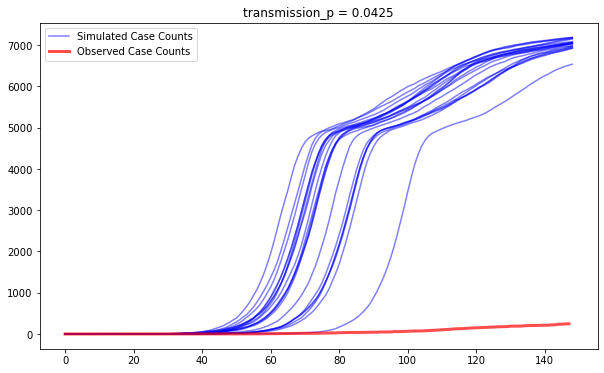

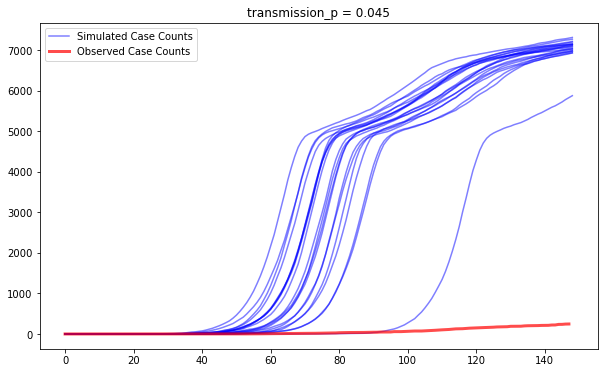

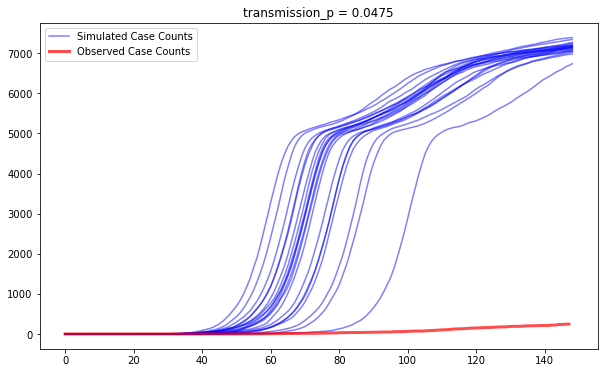

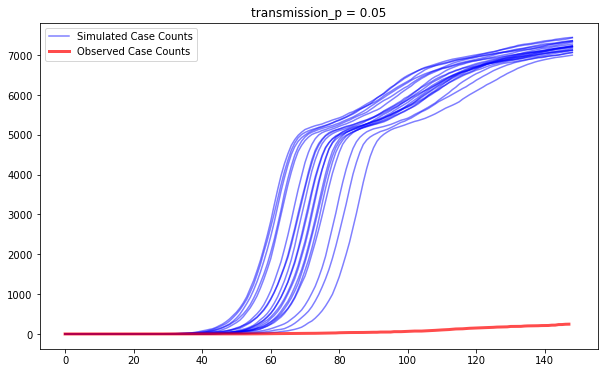

In [19]:
import gc
transmission_ps = [0.0025,0.005,0.0075,0.01,0.0125,0.015, 0.0175,0.018, 0.02, 0.0225, 0.025, 0.0275 , 0.03,.0325, 0.035, 0.0375, 0.04, 0.0425, 0.045, 0.0475, 0.05]
results = {}
scores = {}
ntrajectories = 20
df_results = []
df_lines = pd.DataFrame()
for transmission_p in transmission_ps:
    gc.collect()
    trajs = sample_trajectories(transmission_p, ntrajectories,None,outside_infection_week)
    results[transmission_p] = trajs
    score = score_trajectories(trajs)
    scores[transmission_p] = score
    plot_trajectories(trajs, "transmission_p = {}".format(transmission_p))
    df_results.append([transmission_p,score])
    trajs = pd.DataFrame(trajs)
    trajs['p'] = transmission_p
    df_lines = df_lines.append(trajs)

In [21]:
df_lines

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,p
0,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,15,15,15,0.0025
1,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,32,32,32,32,32,0.0025
2,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,36,0.0025
3,0,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,17,17,17,17,0.0025
4,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,25,25,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0,0,0,0,0,0,0,0,0,0,...,7232,7256,7271,7290,7305,7321,7336,7347,7363,0.0500
16,0,0,0,0,0,0,0,0,0,0,...,7359,7369,7378,7396,7408,7420,7432,7440,7445,0.0500
17,0,0,0,0,0,0,0,0,0,0,...,7334,7349,7362,7373,7378,7390,7401,7418,7439,0.0500
18,0,0,0,0,0,0,0,0,0,0,...,6955,6976,6991,6995,7005,7027,7047,7060,7071,0.0500


In [22]:
df_lines.to_csv('FS_Timeseries.csv')

In [23]:
df_lines['p'].unique()

array([0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175, 0.018 ,
       0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375,
       0.04  , 0.0425, 0.045 , 0.0475, 0.05  ])

In [24]:
df_results = pd.DataFrame(df_results,columns = ['transmission_p','score'])
df_results.to_csv('FS_results.csv')

Text(0.5, 1.0, 'Faculty and Staff Callibration')

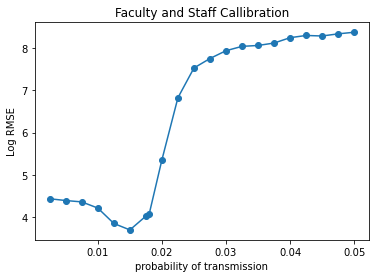

In [25]:
plt.plot(df_results['transmission_p'],df_results['score'])
plt.scatter(df_results['transmission_p'],df_results['score'])
plt.xlabel('probability of transmission')
plt.ylabel('Log RMSE')
plt.title('Faculty and Staff Callibration')

In [24]:
df_results

,transmission_p,score
0,0.0025,4.414843
1,0.0050,4.381739
2,0.0075,4.304742
3,0.0100,4.184762
4,0.0125,3.886632
5,0.0150,3.637511
6,0.0175,4.553635
7,0.0180,4.471811
8,0.0200,5.330270
9,0.0225,6.743171
